In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [68]:
data=pd.read_csv('AirPassengers.csv')

In [69]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [70]:
data.shape

(144, 2)

In [71]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [72]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [74]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [75]:
data=pd.read_csv('AirPassengers.csv',parse_dates=[0],index_col='Month')

In [76]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [77]:
data.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [78]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [79]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


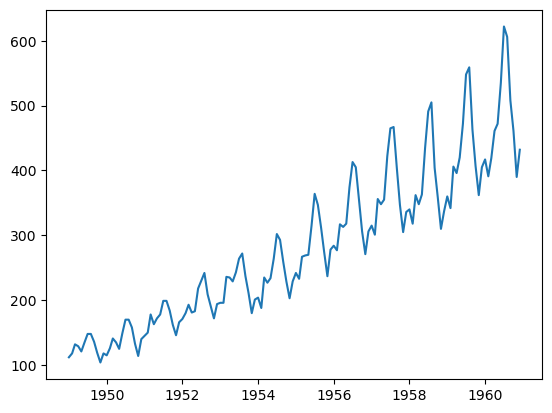

In [80]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(6,3))#canvas  size
plt.plot(data)#line plot
#plt.tight_layout()
## from plot we can see the series given is not stationary

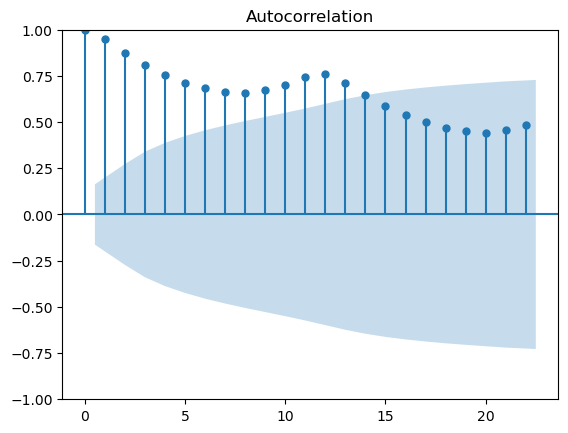

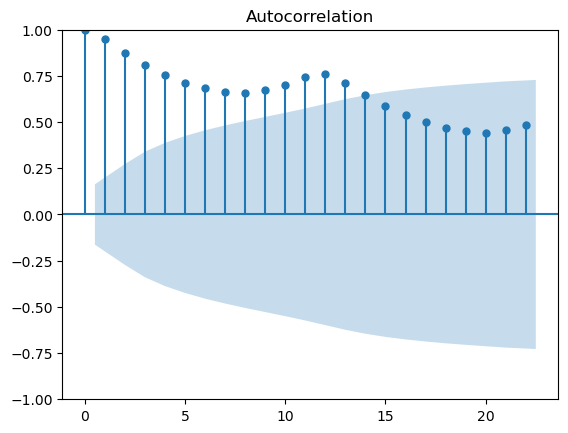

In [81]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [82]:
# 1, ad fuller test is performed
# 2. this test gives us 5 values , one amoung these 5 valyes is p value
# 3. take this p value and compare if p value < 0.05 then we say data is stationary

In [83]:
# ADfuller Test to check stationarity

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Passengers, autolag = 'AIC')#AIC
dftest
# 0.991880243437641, is our p_value
# compare with alpha 0.05
# since p > alpha , we say time series is non stationary

(0.815368879206051,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [84]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [85]:
data1=data.diff(periods=1) #that is applying diff for 1 time on data
data1.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [86]:
data1=data1.iloc[1:] #null value discarded #iloc index location #loc user define index
data1.head()

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


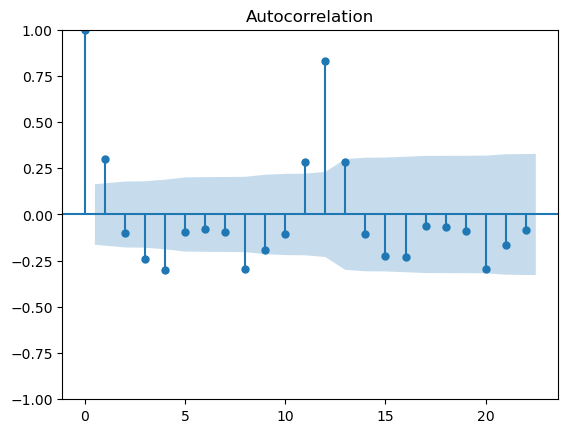

In [87]:
plot_acf(data1);  # autocorrelation plot

In [88]:
data2=data1.diff(periods=1)
data2.head()

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0


In [89]:
data2=data2.iloc[1:]
data2.head()

,Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0


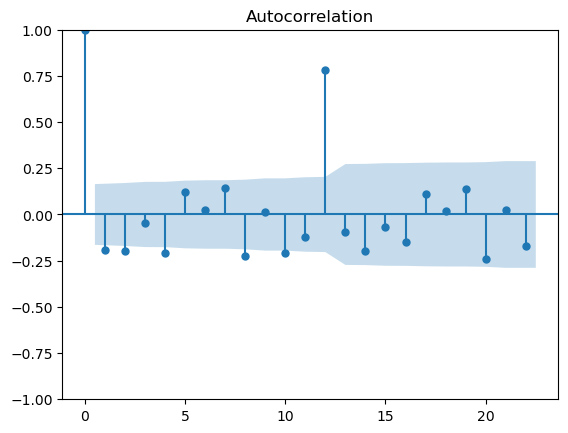

In [90]:
plot_acf(data2);

In [91]:
data2.shape

(142, 1)

In [92]:
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:]  #from 100th row to end - testing data

In [93]:
train.info() #info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [94]:
## Applying autoregressive model

#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [95]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags

from statsmodels.tsa.ar_model import ar_select_order
mod=ar_select_order(data2,maxlag=12,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [96]:
ar_model=AutoReg(train,lags=[1,2,3,4,5,6,7,8,9,10,11,12])
ar_model_fit=ar_model.fit()

In [97]:
prediction=ar_model_fit.predict(start=100,end=142)

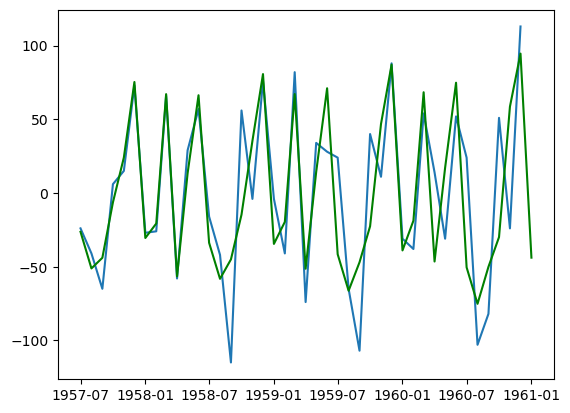

In [98]:
import matplotlib.pyplot as plt
plt.plot(test)
plt.plot(prediction,color='green')

## ARIMA Model

In [99]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

#arima --- AR , I , MA
#arima---(p,d,q)---these p d q are to be given to the arima model by user

In [100]:
model_arima=ARIMA(train,order=(1,1,0))
model_arima_fit=model_arima.fit()

In [101]:
## evaluate the model
print(model_arima_fit.aic)

1021.0396389673766


In [102]:
## predicting the output of sample points
predictions=model_arima_fit.forecast(steps=9)

In [103]:
predictions

1957-07-01    37.765356
1957-08-01    48.751565
1957-09-01    43.323244
1957-10-01    46.005395
1957-11-01    44.680135
1957-12-01    45.334950
1958-01-01    45.011404
1958-02-01    45.171269
1958-03-01    45.092279
Freq: MS, Name: predicted_mean, dtype: float64

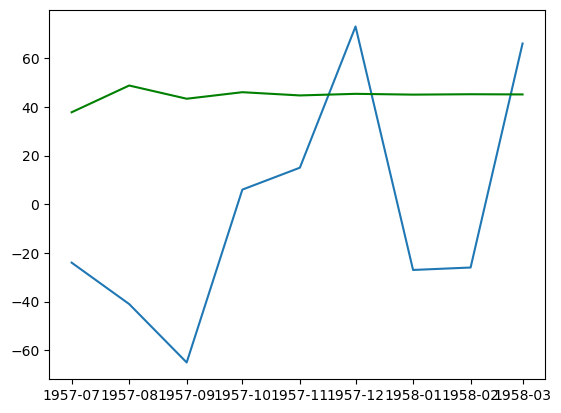

In [104]:
plt.plot(test[:9])
plt.plot(predictions,color='green')

In [105]:
  ## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4
# [0,1,2,3,4]
# [0,1,2,3,4]
# [0,1,2,3,4]

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [106]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]#i will be storing the pdq
list2=[]  # i will be stpring aic value
#it will be easy for me to compaare for which combo of pdf what aic is there

# later on i will go to list where i ahve aic score , get the mini aic

# which eveer combo is givng me the lower aic score that will eb taken as precise pdq value

for params in pdq: #iterating params over pdq
    model_arima=ARIMA(train,order=params) #training model on various pdq values
    model_arima_fit=model_arima.fit()  #training
    print(params,model_arima_fit.aic)  #printing parameter and aic values
    list1.append(params)
    list2.append(model_arima_fit.aic)

(0, 0, 0) 967.9135518309452
(0, 0, 1) 931.4372808378679
(0, 0, 2) 925.729666013612
(0, 0, 3) 920.9009364323597
(0, 0, 4) 912.657138221364
(0, 1, 0) 1046.731900142016
(0, 1, 1) 963.8739381069045
(0, 1, 2) 933.2127666483951
(0, 1, 3) 926.5735237425068
(0, 1, 4) 924.3136224405048
(0, 2, 0) 1143.9983209809495
(0, 2, 1) 1043.7570585081558
(0, 2, 2) 966.1633534921147
(0, 2, 3) 941.6120247430621
(0, 2, 4) 933.7569641535889
(0, 3, 0) 1247.2070979849168
(0, 3, 1) 1139.8659459817973
(0, 3, 2) 1044.647153623526
(0, 3, 3) 972.366114818974
(0, 3, 4) 955.4890117064359
(0, 4, 0) 1351.0676095584174
(0, 4, 1) 1241.6050826096448
(0, 4, 2) 1139.2023567561603
(0, 4, 3) 1048.665413659928
(0, 4, 4) 1001.2308057603212
(1, 0, 0) 963.0127961450215
(1, 0, 1) 928.7077561911431
(1, 0, 2) 919.8685370997459
(1, 0, 3) 921.8388139019764
(1, 0, 4) 923.3886062600994
(1, 1, 0) 1021.0396389673766
(1, 1, 1) 959.4979661017416
(1, 1, 2) 962.9514176527094
(1, 1, 3) 923.2263850515359
(1, 1, 4) 923.101380555424
(1, 2, 0) 1098.

In [107]:
min(list2)

904.9117989195958

In [108]:
forecast=model_arima_fit.forecast(steps=9)
forecast

1957-07-01    -4.901623
1957-08-01    16.171309
1957-09-01    33.830494
1957-10-01    23.270767
1957-11-01    23.700688
1957-12-01    35.136993
1958-01-01    34.699952
1958-02-01    37.859997
1958-03-01    43.513534
Freq: MS, Name: predicted_mean, dtype: float64

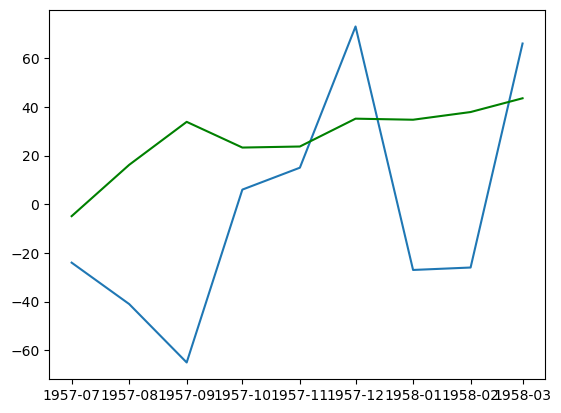

In [109]:
plt.plot(test[:9])
plt.plot(forecast,color='green')

In [110]:
forecast25=model_arima_fit.forecast(steps=25)
test1=test[0:25].values.flatten()
test1

array([ -24.,  -41.,  -65.,    6.,   15.,   73.,  -27.,  -26.,   66.,
        -58.,   29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,
         -4.,  -41.,   82.,  -74.,   34.,   28.,   24.])

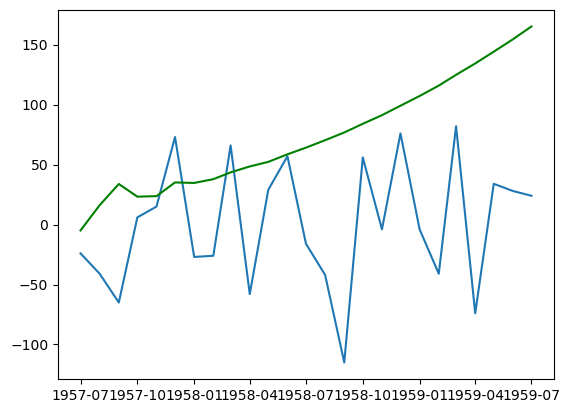

In [111]:
plt.plot(test[:25])
plt.plot(forecast25,color='green')

In [112]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE


    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 9279.05919697542, 'mae': 77.83987624980983, 'rmse': 96.32787341665662}

In [113]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))

# Calculate mean squared error
mean_squared_error(test1, forecast25)

96.32787341665662


9279.05919697542